# Aadu Huli, An Ancient Board Game

In [46]:
# Define the board dimensions and valid nodes as given
valid_nodes = {
    (0, 10), 
    (8, 0), (8, 6), (8, 8), (8, 12), (8, 14), (8, 20),
    (12, 0), (12, 4), (12, 7), (12, 13), (12, 16), (12, 20),
    (16, 0), (16, 2), (16, 6),  (16, 14), (16, 18), (16, 20),
    (20, 0), (20, 5), (20, 15), (20, 20)
}

# Define the edges as given
edges = [
    ((0, 10), [(8, 6), (8, 8), (8, 12), (8, 14)]),
    ((8, 0), [(12, 0), (8, 6)]),
    ((8, 6), [(8, 0), (0, 10), (8, 8), (12, 4)]),
    ((8, 8), [(8, 6), (0, 10), (8, 12), (12, 7)]),
    ((8, 12), [(0, 10), (8, 8), (12, 13), (8, 14)]),
    ((8, 14), [(0, 10), (12, 16), (8, 20)]),
    ((8, 20), [(8, 4), (12, 20)]),
    ((12, 0), [(8, 0), (12, 4)]),
    ((12, 4), [(12, 0), (12, 7), (16, 2)]),
    ((12, 7), [(12, 4), (12, 13), (8, 8), (16, 6)]),
    ((12, 13), [(12, 7), (12, 16), (8, 12), (16, 14)]),
    ((12, 16), [(12, 13)]),
    ((12, 20), [(16, 20), (12, 16)]),
    ((16, 0), [(12, 0), (16, 2)]),
    ((16, 2), [(16, 0), (16, 6), (20, 0)]),
    ((16, 6), [(16, 2), (16, 14), (20, 5), (12, 7)]),
    ((16, 14), [(16, 6), (16, 18), (20, 15), (12, 13)]),
    ((16, 18), [(16, 14), (16, 20), (12, 16)]),
    ((16, 20), [ (12, 20)]),
    ((20, 0), [(20, 5)]),
    ((20, 5), [(20, 0), (20, 15)]),
    ((20, 15), [(20, 5), (20, 20)]),
    ((20, 20), [(20, 15), (16, 18)])
]


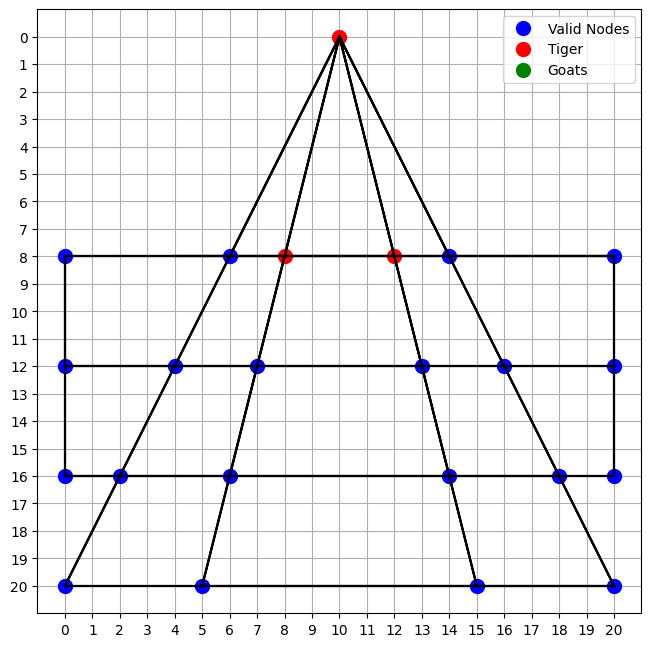

In [45]:
import matplotlib.pyplot as plt

# Function to plot nodes and edges
def plot_board_helper(nodes, edges):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
    
    tiger_nodes = [(0, 10), (8, 8), (8, 12)]
    
    # Plot nodes
    for node in nodes:
        color = 'blue'
        if node in tiger_nodes:
            color = 'red'
        ax.plot(node[1], 20 - node[0], 'o', markersize=10, color=color)
    
    
    # Show Legend:
    ax.plot([], [], 'o', markersize=10, color='blue', label='Valid Nodes')
    ax.plot([], [], 'o', markersize=10, color='red', label='Tiger')
    ax.plot([], [], 'o', markersize=10, color='green', label='Goats')
    ax.legend(loc='upper right')


    # Plot edges
    for edge in edges:
        start_node = edge[0]
        for end_node in edge[1]:
            ax.plot([start_node[1], end_node[1]], [20 - start_node[0], 20 - end_node[0]], '-', color='black')

    # Set limits and aspect
    ax.set_xlim(-1, 21)
    ax.set_ylim(-1, 21)
    ax.set_aspect('equal')
    
    # Set integer ticks on x axis
    ax.set_xticks(range(21))
    
    # Invert and set integer ticks on y axis
    ax.set_yticks(range(21))
    ax.set_yticklabels(range(20, -1, -1))
    
    plt
    plt.grid(True)
    plt.show()

# Plot the board
plot_board_helper(valid_nodes, edges)


In [15]:
# Now if any edge is missing in the edges list, add it to the list

# Check if all edges are bidirectional
for edge in edges:
    start_node = edge[0]
    for end_node in edge[1]:
        if (end_node, [start_node]) not in edges:
            edges.append((end_node, [start_node]))

print("All edges are bidirectional")

All edges are bidirectional


In [16]:
# Now, assert and verify the board dimensions and valid nodes

# Check if all the nodes are in the range of the board
for node in valid_nodes:
    assert 0 <= node[0] < 21
    assert 0 <= node[1] < 21

# Check if every x, y pair is a valid node
for x, y in valid_nodes:
    if (x, y) not in valid_nodes:
        print(x, y)
        assert False

print("All assertions pass")

All assertions pass


In [31]:
# Tigers start at the following nodes
no_of_tigers = 3
tiger_nodes = [(0, 10), (8, 8), (8, 12)]

# Goats
no_of_goats = 15

# Only the tigers start at the given nodes
# Goats are placed turn by turn in empty nodes

In [32]:
# Write the nodes and edges to a json file
import json

data = {
    'nodes': list(valid_nodes),
    'edges': edges,
    'tiger_nodes': tiger_nodes
}

with open('board.json', 'w') as f:
    json.dump(data, f)
    